## <center> Interactive generation of B&eacute;zier and B-spline curves.<br>           Python  functional programming implementation of the <br> de Casteljau and Cox-de Boor  algorithms </center>

The aim of this IPython notebook is twofold: 
- first to illustrate the interactive generation of B&eacute;zier and B-spline curves using the matplotlib  backend `nbagg`, and second
- to give a functional programming implementation of  the basic algorithms related to these classes of curves. 

B&eacute;zier and B-spline curves  are  widely used for interactive heuristic design of  free-form curves in  [Geometric modeling](http://en.wikipedia.org/wiki/Geometric_modeling).

Their properties are usually illustrated through interactive generation using `C` and `OpenGL` or `Java` applets. The new
`matplotlib nbagg` backend enables  the interactive generation of B&eacute;zier and B-spline curves in an IPython Notebook.


### Why functional programming (FP)? 

Lately there has been an increasing interest in pure functional programming and an active debate on whether we can do FP in Python or not.


By [Wikipedia](http://en.wikipedia.org/wiki/Functional_programming):

> *Functional programming is a programming paradigm, a style of building the structure and elements of computer programs, that treats computation as the evaluation of mathematical functions and avoids changing-state and mutable data. It is a declarative programming paradigm, which means programming is done with expressions. In functional code, the output value of a function depends only on the arguments that are input to the function, so calling a function f twice with the same value for an argument x will produce the same result f(x) each time. Eliminating side effects, i.e. changes in state that do not depend on the function inputs, can make it much easier to understand and predict the behavior of a program, which is one of the key motivations for the development of functional programming.*

Python is a multi-paradigm programming language: it is both imperative and object-oriented programming language and    provides a few [constructs](https://docs.python.org/2/howto/functional.html) for  a  functional programming style, as well.

[Here](http://stackoverflow.com/questions/1017621/why-isnt-python-very-good-for-functional-programming) is a discussion on why Python  is not  very good for FP.

 Instead of discussing *pros* and *cons* of Python FP we decided to start a small project and implement it as much as  possible in  a FP style.

Before starting let us  recall a few characteristics of FP: 
- functions are building blocks of FP. They are  first class objects, meaning   that they are treated like any other objects. Functions can be passed as arguments to other functions (called *higher order functions*) or be returned by another  functions.
- FP defines only *pure functions*, i.e. functions without side effects. Such a function acts only on its input to produce output (like mathematical functions). A pure function never interact with the outside world (it does not perform any I/O operation or modify  an instance of a class).
- a FP  program consists in  evaluating expressions, unlike  imperative programming where programs are composed of statements which change global state when executed. 
- FP avoids looping and uses recursion instead.

In this IPython Notebook we try to implement algorithms related to B&eacute;zier and B-spline curves, 
using recursion, iterators, higher order functions.

We also define a class to build interactively a curve. The code for class methods  will be imperative 
as well as for the last function that prepares data for a closed B-spline curve.



### B&eacute;zier curves. de Casteljau algorithm



A B&eacute;zier curve of degree $n$ in the $2$-dimensional space   is a polynomial curve  defined by an ordered set $({\bf b}_0, {\bf b}_1, \ldots, {\bf b}_n)$ of $n+1$ points, called control points. This set is also called control polygon of the B&eacute;zier curve.
 

Its parameterization,  $p:t\in [0,1]\mapsto p(t)\in\mathbb{R}^2$, is defined by:
    $$p(t)=\sum_{k=0}^n{\bf b}_k B^n_k(t), \quad t\in[0,1]$$
where $B^n_k(t)=\binom nk t^k(1-t)^{n-k}, k=0,1,\ldots, n$, are Bernstein polynomials.




To compute a point on a  B&eacute;zier curve theoretically we have to  evaluate the above parameterization $p$ at a parameter $t\in[0,1]$. In Geometric Modeling a more stable algorithm is used instead, namely the *de Casteljau algorithm*.


De Casteljau algorithm provides a procedural method to compute recursively a point, $p(t)$, on a Bezier curve. 

Given the control points  $({\bf b}_0, {\bf b}_1, \ldots, {\bf b}_n)$, and a parameter $t\in [0,1]$, one computes  in each step $r=\overline{1,n}$ of the recursion, the points:
    $$ {\bf
b}_{i}^{r}(t)=(1-t)\,{\bf b}_{i}^{r-1}(t)+t\,{\bf b}_{i+1}^{r-1}(t),\:
 i=\overline{0,n-r}, $$ 
i.e. the $i^{th}$ point  ${\bf
b}_{i}^{r}(t)$, from the step $r$,  is a convex combination of the $i^{th}$ and  $(i+1)^{th}$ point from  the step $r-1$:

$$
\begin{array}{lll} {\bf b}^{r-1}_i&\stackrel{1-t}{\rightarrow}&{\bf
b}^{r}_i\\
{\bf b}^{r-1}_{i+1}&\stackrel{\nearrow}{t}&\end{array}$$

The control points calculated in the intermediate steps can be displayed in a triangular array:
 $$
\begin{array}{llllll} 
{\bf b}_0^0     &  {\bf b}_{0}^1         &  {\bf b}_{0}^2& \cdots       & {\bf b}_0^{n-1}& {\bf b}^n_0\\
{\bf b}_1^0     &   {\bf b}_{1}^1         & {\bf b}_{1}^2& \cdots       & {\bf b}_1^{n-1}& \\
{\bf b}_2^0     &   {\bf b}_{2}^1        & {\bf b}_{2}^2   & \cdots       &  & \\
\vdots          &          \vdots        &\vdots       &        & & \\
{\bf b}_{n-2}^0 &  {\bf b}_{n-2}^1&       {\bf b}_{n-2}^2& & & \\
{\bf b}_{n-1}^0 &  {\bf b}_{n-1}^1       & &  & & \\
{\bf b}_n^0     &      & & & &  \end{array} $$

The points ${\bf b}_i^0$ denote the given control points ${\bf b}_i$, $i=\overline{0,n}$.

The number of  points reduces by 1, from a step to the next one, such that at the final step, $r=n$, we get only one point, ${\bf b}_0^n(t)$, which is the point $p(t)$
on the B&eacute;zier curve.




The  image below illustrates the points computed by de Casteljau algorithm for a B&eacute;zier curve defined by 4 control points, and a fixed parameter $t\in[0,1]$:

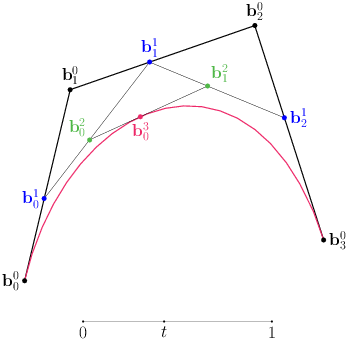

In [5]:
from IPython.display import Image
Image(filename='Imag/Decast4p.png')

We define two functions that implement this recursive scheme. In both cases 
we consider  2D points as tuples of float numbers and control polygons  as lists of tuples.

First an imperative programming implementation of the de Casteljau algorithm:

In [6]:
import numpy as np

In [7]:
class InvalidInputError(Exception):
    pass

In [8]:
def deCasteljauImp(b,t): 
    N=len(b) 
    if(N<2):
        raise InvalidInputError("The  control polygon must have at least two points")
    a=np.copy(b) #shallow copy of the list of control points and its conversion to a numpy.array 
    for r in range(1,N): 
        a[:N-r,:]=(1-t)*a[:N-r,:]+t*a[1:N-r+1,:]# convex combinations in step r                               
    return a[0,:]


This is a typical imperative programming code: assignment statements,  `for` looping.
Each call of this function copies the control points into a numpy array `a`.    
The convex combinations `a[i,:] =(1-t) *a[i,:]+t*a[i-1,:]`, $i=\overline{1,n-r}$, that must be calculated in each step $r$ 
are vectorized, computing convex combinations of points from two slices in  the `numpy.array`  `a`.

A discrete version of a Bezier curve, of `nr` points is computed by this function:
    

In [9]:
def BezierCv(b, nr=200):# compute nr points on the Bezier curve of control points in list bom
    t=np.linspace(0, 1, nr)
    return [deCasteljauImp(b, t[k]) for k in range(nr)]      

For a FP implementation of de Casteljau algorithm we use standard Python.

First we define functions that return an [affine](http://en.wikipedia.org/wiki/Affine_combination)/ [convex](http://en.wikipedia.org/wiki/Convex_combination) combination of two numbers, two 2D points, respectively of each pair of  consecutive points in a list of 2D control points:

In [7]:
cvx=lambda x, y, t: (1-t) * x + t * y # affine/convex combination of two numbers x, y

cvxP=lambda (P, Q, t): (cvx(P[0], Q[0], t), cvx(P[1], Q[1], t))# affine/cvx comb of two points P,Q

                                                                  
def cvxCtrlP(ctrl, t):# affine/cvx combination of each two consecutive points in a list ctrl 
                      # with the same coefficient t    
    return map(cvxP, zip(ctrl[:-1], ctrl[1:], [t]*(len(ctrl)-1))) 

The  recursive  function implementing  de Casteljau scheme:

In [10]:
def deCasteljauF(b, t):
    # de Casteljau scheme - computes the point p(t) on the Bezier curve of control polygon b
    
    if len(b)>1:
        return deCasteljauF(cvxCtrlP( b, t), t)
    else: 
        return b[0]


A  B&eacute;zier curve of control polygon ${\bf b}$  is discretized calling `deCasteljauF` function for each
parameter $t_j=j/(nr-1)$, $j=\overline{0,nr-1}$, where $nr$ is the number of points to be calculated:


In [16]:
def BezCurve(b, nr=200):
    #computes nr points on the Bezier curve of control points b  
    
    return map(lambda s: deCasteljauF(b,s),  map(lambda j: j*1.0/(nr-1), xrange(nr)))
    

`map(lambda s: deCasteljauF(b,s),  map(lambda j: j*1.0/(nr-1), xrange(nr))` means that the function
     `deCasteljauF` with fixed list of control points, `b`, and the variable parameter `s` is mapped to the list
     of  parameters $t_j$ defined above. Instead of defining the list of parameters through comprehension `[j*1.0/(nr-1) for j in xrange(nr)]`
     we created it calling the  higher order function `map`:

`map(lambda j: j*1.0/(nr-1), xrange(nr))`

Obvioulsly the FP versions of de Casteljau algorithm   and `BezCurve` are more compact
than the corresponding imperative versions, but they are not quite readable at the first sight.



To choose interactively the control points of a B&eacute;zier curve (and later of a B-spline curve) and  to plot the curve, we set now  the `matplotlib nbagg` backend, and  define the class `BuildB`, below:

In [13]:
%matplotlib notebook

In [14]:
import matplotlib.pyplot as plt

In [12]:
def Curve_plot(ctrl, func):
    # plot the control polygon and the corresponding curve discretized by the function func
    xc, yc = zip(*func(ctrl))
    xd, yd = zip(*ctrl)
    plt.plot(xd,yd , 'bo-', xc,yc, 'r') 

In [17]:
class BuildB(object): #Build a Bezier/B-spline Curve
    
    def __init__(self, xlims=[0,1], ylims=[0,1], func=BezCurve):
        self.ctrl=[]     # list of control points
        self.xlims=xlims # limits for x coordinate of control points
        self.ylims=ylims # limits for y coordinate
        self.func=func   # func - function that discretizes a curve defined by the control polygon ctrl
        
    def callback(self, event):  #select control points with  left  mouse button click
        if event.button==1 and event.inaxes:
            x,y = event.xdata,event.ydata
            self.ctrl.append((x,y))  
            plt.plot(x, y,  'bo') 
       
        elif event.button==3:  #press right  button to plot the curve
            Curve_plot(self.ctrl, self.func) 
            plt.draw() 
            
        else: pass
        
    def B_ax(self):#define axes lims

        fig = plt.figure(figsize=(6, 5))
        ax = fig.add_subplot(111)
        ax.set_xlim(self.xlims)
        ax.set_ylim(self.ylims)
        ax.grid('on')   
        ax.set_autoscale_on(False)
        fig.canvas.mpl_connect('button_press_event', self.callback)

Now we build the object `C`,  set the axes for the curve to be generated, and choose the control points
with the left mouse button click. A right button click generates the corresponding curve:

<IPython.core.display.Javascript object>


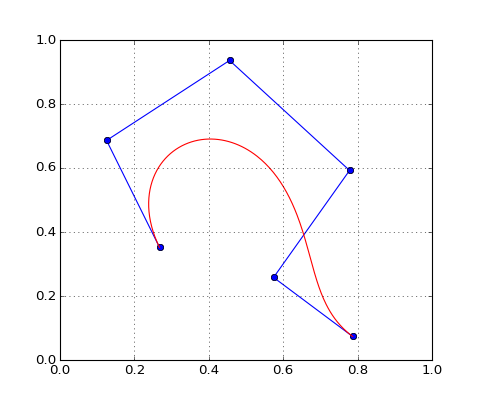

In [14]:
C=BuildB()
C.B_ax()

### Subdividing a B&eacute;zier curve

Let $\Gamma$ be a B&eacute;zier curve of  control points $({\bf b}_0, {\bf b}_1, \ldots, {\bf b}_n)$, and
    $s\in (0,1)$  a parameter. Cutting (dividing) the curve at the point  $p(s)$ we get two arcs of polynomial curves, which can be also expressed as Bezier
    curves. The problem of finding the control polygons of the two arcs is called *subdivision of the B&eacute;zier curve* at $s$.
    
    

The control points  ${\bf d}_r$, $r=\overline{0,n}$, of the  right arc of Bezier curve are:
  $${\bf d}_r={\bf b}_{n-r}^r(s),$$
where  ${\bf b}^r_{n-r}(s)$ are points generated in the $r^{th}$ step of the  de Casteljau algorithm from the  control  points
$({\bf b}_0, {\bf b}_1, \ldots, {\bf b}_n)$, and the parameter $s$  [Farin].

More precisely, the right polygon consists in last points computed in each step, $r=0,1,\ldots, n$, of the de Casteljau algorithm (see the triangular matrix of points displayed above):
${\bf b}^0_n(s), {\bf b}^1_{n-1}(s), \ldots, {\bf b}^n_0(s)$.



The recursive function `get_right_subPol` returns the right subpolygon of a subdivision at parameter $s$:

In [15]:
def get_right_subpol(b,s, right=[]): # right is the list of control points for the right subpolygon
    
    right.append(b[-1]) # append the last point in the list
    if len(b)==1:
        return right
    else:
        return get_right_subpol(cvxCtrlP(b,s), s, right)

To get the left subpolygon we exploit the invariance of a B&eacute;zier curve to reversing its control points.
The B&eacute;zier curve defined by the control points 
${\bf b}_n,{\bf b}_{n-1}, \ldots, {\bf b}_0$, coincides with that defined by
${\bf b}_0,{\bf b}_{1}, \ldots, {\bf b}_n$. 

If $p$ is the Bernstein parameterization of the curve defined by 
${\bf b}_0,{\bf b}_{1}, \ldots, {\bf b}_n$
 and $\tilde{p}$ of that  defined by the reversed control polygon, ${\bf b}_n,{\bf b}_{n-1}, \ldots, {\bf b}_0$, then $p(t)=\tilde{p}(1-t)$ [Farin].
    
This means that the **left** subpolygon of the subdivision of the former curve at  $s$,
    is the **right** subpolygon resulted by dividing the latter curve  at $1-s$.
  
Now  we can define the function  that returns the left and right subpolygon of a B&eacute;zier curve subdivision:


In [16]:
def subdivision(b, s):
    #returns the left and right subpolygon, resulted dividing the curve of control points b, at s
        #if(s<=0 or s>=1):
            #raise InvalidInputError('The subdivision parameter must be in the interval (0,1)')
            
        return (get_right_subpol( b[::-1], 1-s, right=[]), get_right_subpol( b, s, right=[]))
      

Define a function to plot the subpolygons:

In [17]:
def plot_polygon(pol, ch):# plot a  control polygon computed  by an algorithm from a Bezier curve
        
    plt.plot(zip(*pol)[0], zip(*pol)[1], linestyle='-',  marker='o', color=ch)
        

Let us generate a B&eacute;zier curve and subdivide it at $s=0.47$:

<IPython.core.display.Javascript object>


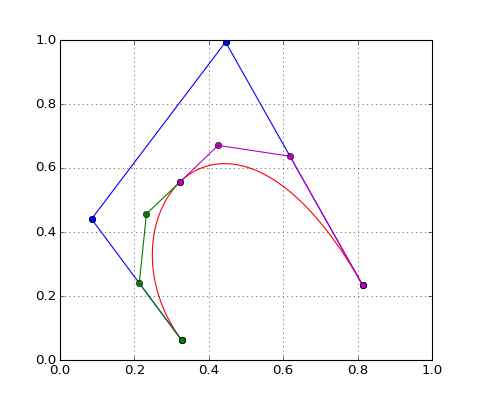

In [18]:
cv=BuildB()
cv.B_ax()

In [19]:
left, right=subdivision(cv.ctrl, 0.47)
plot_polygon(left, 'g')
plot_polygon(right, 'm')

### Multi-affine de  Casteljau algorithm

The above de Casteljau algorithm is the classical one.  There is a newer approach to  define and study B&eacute;zier
curves through polarization.

Every  polynomial curve of degree n, parameterized by $p:[a,b]\to\mathbb{R}^2$ defines a [symmetric multiaffine
    map](http://www.cs.utah.edu/~xchen/blossom/node7.html) $g:\underbrace{[a,b]\times[a,b]\times[a,b]}_{n}\to \mathbb{R}^d$, such that
        $p(t)=g(\underbrace{t,t,\ldots,t }_{n})$, for every $t\in[a,b]$.
  
$g$ is called the *polar form* of the polynomial curve. An  argument $(u_1, u_2, \ldots, u_n)$ of the polar form  $g$ is called *polar bag*. 

If $p(t)$ is the Bernstein parameterization of a Bezier curve of control points 
${\bf b}_0,{\bf b}_{1}, \ldots, {\bf b}_n$, and $g:[0,1]^n\to\mathbb{R}^2$ its polar form, then the control points are related to $g$ as follows [Gallier]:

$${\bf b}_j=g(\underbrace{0, 0, \ldots, 0}_{n-j}, \underbrace{1,1, \ldots, 1}_{j}), \quad j=0,1, \ldots, n$$

This relationship allows to define B&eacute;zier curves by a parameterization $P$ defined not only on the interval $[0,1]$ but also on an arbitrary interval $[r,s]$. Namely, given a symmetric multiaffine map $g:[r,s]^n\to\mathbb{R}^2$
the associated polynomial curve $P(t)=g(\underbrace{t,t,\ldots, t}_{n})$, $t\in[r,s]$, expressed as a B&eacute;zier curve has the control points defined by [Gallier]:
$${\bf b}_j=g(\underbrace{r, r, \ldots, r}_{n-j}, \underbrace{s,s, \ldots, s}_{j}), \quad j=0,1, \ldots, n$$


Given the control points  ${\bf b}_0,{\bf b}_{1}, \ldots, {\bf b}_n$ of a B&eacute;zier curve, and a polar bag $(u_1, u_2, \ldots, u_n)\in[r,s]^n$ the multi-affine de Casteljau algorithm
evaluates the corresponding multi-affine map, $g$, at this polar bag through a recursive formula similar to the classical
de Casteljau formula:
    
$${\bf b}^k_i= \displaystyle\frac{s-u_k}{s-r}\:{\bf b}_i^{k-1}+ \displaystyle\frac{u_k-r}{s-r}\:{\bf b}_{i+1}^{k-1}, \quad k=\overline{1,n}, i=\overline{0,n-k}$$ 
    

The point $b_0^n$ computed in the last step is the polar value, $g(u_1,u_2, \ldots, u_n)$.

Unlike the classical de Casteljau formula, where in each step the parameter for the convex combination
is the same, here in each step $k$ the parameter involved in convex combinations changes, namely it is 
$\displaystyle\frac{u_k-r}{s-r}$. 

In order to define a recursive function to implement this scheme
we consider the polar bag as an [iterator](http://nbviewer.ipython.org/github/empet/pytwist/blob/master/Generators-and-Dynamical-Systs.ipynb) associated to the list containing its coordinates, i.e. if `L=[u[0], u[1], ..., u[n-1]]` is the list, `iter(L)` is its iterator:

In [20]:
def deCasteljauAff(b,  r, s, u):  #multi-affine de Casteljau algorithm
    
        # b is the list of control points b_0, b_1, ..., b_n
        # [r,s] is a subinterval 
        # u is the iterator associated to the polar bag [u_0, u_1, u_{n-1}], n=len(b)-1  
        
        if len(b)>1:
            return deCasteljauAff(cvxCtrlP( b, (u.next()-r)/(s-r)), r, s, u)
        else: return b[0]
        

Usually we should  test the concordance between the length (n+1) of the control polygon and the number of elements of the iterator 
u. Since a `listiterator` has no length we have to count its elements. Functionally this number would get as:
`len(map(lambda item: item, u))`

What characteristic elements of a B&eacute;zier curve can the multi-affine de Casteljau  algorithm compute?

**1.** The direction of the tangent to a  B&eacute;zier curve of degree $n$, at a point $p(t)$, is defined by the vector
$\overrightarrow{{\bf b}^{n-1}_0{\bf b}^{n-1}_1}$. The end points of this vector are the points computed in
the $(n-1)^{th}$
step of the classical de Casteljauscheme. On the other hand,  these points are polar values of the corresponding
multiaffine map $g$ [Gallier], namely:

$${\bf b}^{n-1}_0=g(\underbrace{t,t,\ldots, t}_{n-1}, 0),  \quad {\bf b}^{n-1}_1=g(\underbrace{t,t,\ldots, t}_{n-1}, 1)$$
Thus they can be computed by the function   `deCasteljauAff`.

Let us generate a B&eacute;zier curve and draw the tangent at the point corresponding to $t=0.45$:

<IPython.core.display.Javascript object>


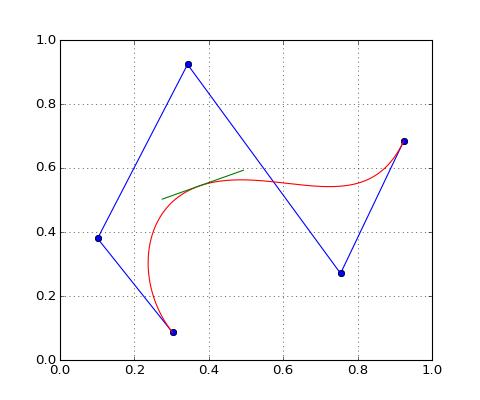

In [21]:
ct=BuildB()
ct.B_ax()

In [24]:
n=len(ct.ctrl)-1


In [25]:
t=0.45
u=[t]*(n-1)+[0]
v=[t]*(n-1)+[1]

In [26]:
A=deCasteljauAff(ct.ctrl, 0,1, iter(u))
B=deCasteljauAff(ct.ctrl, 0,1, iter(v))
plt.plot([A[0], B[0]], [A[1], B[1]], 'g')

**2.** The multi-affine de Casteljau algorithm can also be applied to redefine a subarc of a B&eacute;zier curve as a B&eacute;zier curve.
More precisely, let us assume that a B&eacute;zier curve of control points ${\bf b}_j$, $j=\overline{0,n}$,
and parameterization $p$ defined on the interval [0,1] is cut at the points corresponding to the parameters $r<s$, $r, s\in[0,1]$.
The arc between $p(r)$ and $p(s)$ is also a polynomial curve  and its control points are [Gallier]:
    $${\bf c}_j=g(\underbrace{r,r,\ldots, r}_{n-j}, \underbrace{s,s\ldots, s}_{j}),\quad j=\overline{0,n}$$
where $g$ is the polar form  of the initial curve.

The function `polar_bags` below defines the list of polar bags involved in computation of the control points ${\bf c}_j$:

In [27]:
def polar_bags(r,s, n):
    
    return map(lambda j: [r]*(n-j)+[s]*j, xrange(n+1)) 


In [28]:
r=0.3
s=0.67
n=3
L=polar_bags(r, s, n)
print L

[[0.3, 0.3, 0.3], [0.3, 0.3, 0.67], [0.3, 0.67, 0.67], [0.67, 0.67, 0.67]]


In [29]:
def redefineBezier(b,  r, s):
        # returns the control polygon for the subarc of ends p(r), p(s)
        #of  a Bezier curve defined by control polygon b
        
        
        #if(r<0 or s>1 or r>s or s-r<0.1):
            #raise InvalidInputError('innapropriate  interval ends')
        
        return map(lambda u: deCasteljauAff(b,  0, 1, iter(u)), polar_bags(r,s, len(b)-1))

Now let us test this function:

<IPython.core.display.Javascript object>


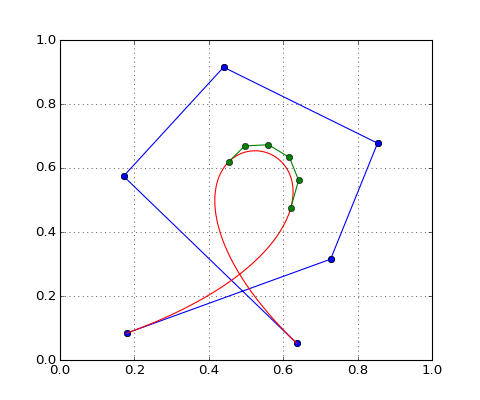

In [30]:
Bez=BuildB()
Bez.B_ax()

In [31]:
br=redefineBezier(Bez.ctrl,  0.3, 0.67)
plot_polygon(br, 'g')

**3.** The function `redefineBezier` can  also be invoked to compute the left and right subpolygons resulted from a subdivision of a  B&eacute;zier curve, 
at a point corresponding to the paramater $s$. Namely the left subpolygon is returned by
`redefineBezier(b,  0, s)`, whereas the right subpolygon by `redefineBezier(b,  s, 1)`                                                                                                       

### B-spline curves

We give a procedural definition of a B-spline curve of degree $k$, not an analytical one.

The following data: 

- an interval $[a,b]$;

- an integer $k\geq 1$;

- a sequence of knots:

    $$u_0 = u_1 = \cdots = u_k< u_{k+1} \leq \cdots \leq u_{m−k−1} < u_{m−k} = \cdots = u_{m−1} = u_m$$

  with  $u_0 = a, u_m = b$,    $m−k > k$, and each knot $u_{k+1}, \ldots, u_{m-k-1}$ of  multiplicity at most $k$;
- the control points ${\bf d}_0, {\bf d}_1, \ldots, {\bf d}_{m-k-1}$, called de Boor points;

define a curve $s:[a,b]\to\mathbb{R}^2$, such that for each $t$ in an interval $[u_J, u_{J+1}]$, with
$u_J<u_{J+1}$, $s(t)$ is computed in the last step of the Cox-de Boor recursive formula [Gallier]:
 $$\begin{array}{lll}
{\bf d}^0_i&=&{\bf d}_i,\quad i=\overline{J-k,J}\\
 {\bf d}_i^r(t)&=&(1-\omega_i^r(t))\,{\bf d}_{i-1}^{r-1}(t)+\omega_i^r(t)\,{\bf d}_{i}^{r-1}(t),\,\,
r=\overline{1, k}, i=\overline{J-k, J}\end{array}$$
with $\omega_i^r(t)=\displaystyle\frac{t-u_{i}}{u_{i+k-r+1}-u_{i}}$               

 The curve defined in this way is called B-spline curve. It is a piecewise polynomial curve of degree
 at most $k$, i.e. it is a polynomial curve  on each nondegenerate interval $[u_J, u_{J+1}]$, and at each knot $u_J$ of multiplicity $1\leq p\leq k$, it is of class $C^{k-p}$.             

The points computed in the steps $r=\overline{1,k}$ of the recursion can be written in a lower triangular matrix:
                                                               
$$ 
\begin{array}{ccccc}
{\bf d}^0_{0}&             &   &   &  \\
{\bf d}^0_{1} & {\bf d}_{1}^1&   &   &   \\
\vdots    & \vdots     &   &   &   \\
{\bf d}^0_{k-1}     & {\bf d}_{k-1}^1    &\ldots & {\bf d}_{k-1}^{k-1}&  \\
{\bf d}^0_{k}& {\bf d}_{k}^1 &\ldots & {\bf d}_{k}^{k-1} &{\bf d}_{k}^{k}
\end{array}
$$

Unlike the classical de Casteljau  or the multi-affine de Casteljau scheme, in the de Boor-formula
for each pair of consecutive points ${\bf d}^{r-1}_{i-1}, {\bf d}_i^{r-1}$, one computes a convex combination with the 
coefficient $\omega_i^r$ depending both on $r$ and $i$.

In a first attempt to write a recursive function that implements the Cox-de Boor formula we  defined an
auxiliary function `Omegas`, that returns a list of  lists. An inner list contains the  elements $\omega^r_i$,  involved in a step of the recursive formula.

Using list comprehension the function Omegas returns:

`[[(t-u[j])/(u[j+k-r+1]-u[j]) for j in range(r, k+1) ] for r in range(1,k+1)]`    

Although later we chose another solution, we give this function as an interesting  example of FP code (avoiding list comprehension):

In [32]:
from functools import partial

def Omegas(u, k, t): 
    # compute  a list of lists 
    #an inner list contains the values $\omega_j^r(t)$ values from a step r
        
    #if (len(u)!=2*k+1):
        #raise InvalidInputError('the list u must have length 2k+1')
    return map(lambda r: map(partial(lambda r, j: (t-u[j])/(u[j+k-r+1]-u[j]), r), \
                         xrange(r,k+1)), xrange(1, k+1)) 

The function `functools.partial` associates to a multiargument function
a partial function in the same way as  in mathematics, i.e. if  $f(x_1, x_2, \ldots, x_n)$ is a n-variable function
 $g(x_2, \ldots, x_n)=f(a, x_2, \ldots, x_n)$, with $a$ fixed, is a partial function. More details [here](https://docs.python.org/2/library/functools.html).

In `Omegas` is involved the partial function of the anonymous function 

`lambda r, j: (t-u[j])/(u[j+k-r+1]-u[j])`

defined by  freezing `r`.

Let us test it:

In [33]:
k=3
u=[j for j in range(7)]

LL=Omegas( u, k, 3.5)
print LL

[[0.8333333333333334, 0.5, 0.16666666666666666], [0.75, 0.25], [0.5]]


Noticing that in each step $r>1$, the coefficients $\omega^r_i$ are computed with the same formula as for
$r=1$, i.e.  $\omega_i^r=\displaystyle\frac{t-u_i}{u_i+k-u_i}$ but for the  knots in the list
`u[r-1: -r+1]` and $k=k-r+1$ we 
define the function `omega` below, instead of `Omegas`:


In [34]:
def omega(u, k, t):
    # defines the list of coefficients for the convex combinations performed in a step of de Boor algo
    
    #if (len(u)!=2*k+1 or t<u[k] or t>u[k+1]):
        #raise InvalidInputError('the list u  has not the length 2k+1 or t isn't within right interval')
    
    return map(lambda j: (t-u[j]) / (u[j+k]-u[j]),  xrange(1,k+1))

We also need a new function that calculates the convex combinations of each pair of points in a list,
with distinct coefficients given in a list `alpha`:

In [35]:
def cvxList(d, alpha):
    #len(d)=len(alpha)+1
    return  map(cvxP, zip(d[:-1], d[1:], alpha))

The recursive Cox-de Boor formula is now implemented in the following way:

In [18]:
def DeBoor(d, u, k, t):
    #len(d) must be (k+1) and len(u)=2*k+1:
    # this algorithm evaluates a point c(t) on an arc of B-spline curve
    # of degree k, defined by:
    # u_0<=u_1<=... u_k<u_{k+1}<=...u_{2k}  the sequence of knots
    # d_0, d_1, ... d_k   de Boor points 
    
    if(len(d)==1):
        return d[0]  
    else:       
        return  DeBoor(cvxList(d, omega(u, k,t)), u[1:-1], k-1,t)


To experiment the interactive generation of B-spline curves we give the restrictions  on  input data that lead to  a  closed B-spline curve:

A B-spline curve of degree k, defined on an interval $[a,b]$ by the following data:

- de Boor  control polygon:
   $({\bf d}_0, \ldots, {\bf d}_{n-k},\ldots,{\bf d}_{n-1})$   such that
    $$\begin{array}{llllllll}
{\bf d}_0,&{\bf d_1},&\ldots,& {\bf d}_{n-k-1},   & {\bf d}_{n-k},      &  {\bf d}_{n-k+1},   & \ldots& {\bf d}_{n-1}\\
     &     &       &               & \shortparallel &\shortparallel &  &\shortparallel\\
     &     &       &               &   {\bf d}_0         & {\bf d}_1
     &\ldots& {\bf d}_{k-1}\end{array}$$
- a knot sequence obtained by extending through periodicity of period $T=b-a$ of the sequence of knots $a=u_k\leq\cdots\leq u_n=b$ ($n\geq 2k$):

$$\begin{array}{lll}u_{k-j}&=&u_{n-j}-T\\ u_{n+j}&=&u_{k+j}+T\\& & j=1,\ldots k\end{array}$$

is a closed B-spline curve.


In our implementation we take a uniform sequence of knots of the interval $[a,b]$

- The de Boor points are chosen interactively with the left mouse button click within the plot window.
- A point is a tuple of real numbers, and the control polygon is a list of tuples.
     

The next function constructs the periodic sequence of knots and the de Boor polygon such that to
generate from the interactively chosen control points a closed B-spline curve, of degree $3$, and
of class $C^{2}$ at each knot.
The function's code is imperative:

In [37]:
def Bspline(d, k=3, N=100):
    L=len(d)-1
    n=L+k+1
    #extend the control polygon
    d+=[d[j] for j in range (k+1)]
     
    #make uniform knots
    u=np.arange(n+k+1)
    # define the period T
    T=u[n]-u[k]
    #extend the sequence of knots
    u[:k]=u[n-k:n]-T
    u[n+1:n+k+1]=u[k+1:2*k+1]+T
    u=list(u)
    
    curve=[]#the list of points to be computed  on the closed B-spline curve
    for J in range(k, n+1):
   
        if u[J]<u[J+1]:
           t=np.linspace(u[J], u[J+1], N)
        else: continue    
    
        curve+=[DeBoor(d[J-k:J+1],  u[J-k:J+k+1], k, t[j])  for j in range (N) ]
    return curve

We build the control polygon and draw the corresponding closed B-spline curve:

In [41]:
D=BuildB(func=Bspline)

<IPython.core.display.Javascript object>


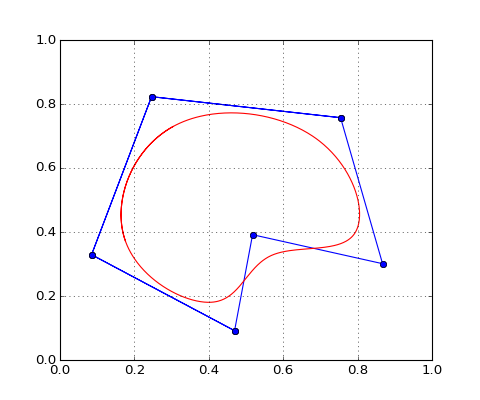

In [42]:
D.B_ax()

After these experiments our conclusion is that you can insert functional programming code in your imperative  Python code, but trying to write pure functions could be  difficult, sometimes impossible.

Writing FP style Python code is challenging, but the  code is not so easy  to read, unlike the imperative Python code which is characterized as a readable one.



The next step in experimenting FP will be to use a  Python implementation of  monads (see for example  [Pymonad](https://pypi.python.org/pypi/PyMonad/) or [fn.py](https://github.com/kachayev/fn.py).

In this IPython Notebook we avoided to raise errors and commented the lines handling errors.

 The  algorithms implemented in this IPython Notebook are presented in detail in:
 1. G Farin,  *Curves and Surfaces for Computer Aided Geometric Design: A Practical Guide*,   Morgan Kaufmann, 2002.
 2. J. Gallier, *Curves and Surfaces in Geometric Modeling: Theory and Algorithms*,  Morgan Kaufmann, 1999. Free electronic version can be downloaded [here](http://www.cis.upenn.edu/~jean/gbooks/geom1.html).

Emilia Petrisor, 2/10/2015.


In [19]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()